In [63]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from joblib import dump, load
from sklearn.metrics import plot_confusion_matrix

In [2]:
data = pd.read_csv('data/preprocessedDREAMER.csv')
labels = pd.read_csv('data/DREAMER_emotLabels.csv')

# Fixing Data

In [3]:
data.head()

,P1V1,P1V3,P1V4,P1V6,P1V7,P1V8,P1V9,P1V12,P1V13,P1V14,...,P23V7,P23V8,P23V9,P23V12,P23V13,P23V14,P23V15,P23V16,P23V17,P23V18
0,80.714661,76.768877,73.268849,73.162212,72.619208,73.512364,74.482759,75.008139,76.328559,71.092304,...,49.112710,55.667114,54.275618,64.782792,69.432446,68.724832,79.425452,67.368421,115.488722,87.771429
1,80.700525,76.862321,72.550607,72.579992,72.296934,73.424512,74.352562,74.651254,76.373209,71.092304,...,49.093088,55.443565,53.851133,64.846608,72.282353,68.024801,78.253275,67.037643,115.488722,80.418848
2,80.526953,76.883117,72.258065,72.355316,72.016075,73.252487,74.133262,74.053837,76.657636,70.956522,...,48.876591,55.114546,53.490490,65.352731,71.366420,64.257825,77.631769,67.629447,115.488722,80.418848
3,80.375688,76.748143,71.498870,72.277494,71.785285,73.103073,74.043921,73.796877,76.935769,70.841020,...,48.474204,55.008264,53.347582,65.254214,69.427464,65.094257,76.619718,67.037643,79.175258,110.503597
4,79.712575,76.325544,71.082904,72.433849,71.539726,72.885033,73.583356,73.583356,77.463977,70.802603,...,48.242524,54.834546,53.219616,64.810127,68.281840,64.828991,75.793369,66.107784,78.971722,NaN


In [4]:
labels.head()

,P1V1,P1V3,P1V4,P1V6,P1V7,P1V8,P1V9,P1V12,P1V13,P1V14,...,P23V7,P23V8,P23V9,P23V12,P23V13,P23V14,P23V15,P23V16,P23V17,P23V18
0,4.0,5.0,4.0,1.0,5.0,1.0,1.0,4.0,4.0,3.0,...,4.0,1.0,2.0,4.0,4.0,2.0,2.0,3.0,2.0,2.0
1,3.0,4.0,3.0,2.0,4.0,2.0,2.0,3.0,3.0,1.0,...,2.0,5.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0
2,2.0,4.0,2.0,5.0,4.0,4.0,3.0,4.0,2.0,2.0,...,1.0,5.0,2.0,2.0,3.0,2.0,2.0,2.0,4.0,2.0


In [5]:
stressLabel = []
for col in labels:
    if labels[col].values[1] <= 2.5 and labels[col].values[0] <= 2.5:
        stressLabel.append(1)
    else:
        stressLabel.append(0)

In [6]:
stressLabel.count(1)

31

In [12]:
colLen = 364
dataStretched = pd.DataFrame()
for col in data.columns:
    print(col)
    tempData = data[col].dropna().to_list()
    while len(tempData) < colLen:
        tempData = tempData + tempData
        
    tempData = tempData[0:colLen]
    dataStretched = pd.concat([dataStretched, pd.DataFrame({col : tempData})], axis=1)

P1V1
P1V3
P1V4
P1V6
P1V7
P1V8
P1V9
P1V12
P1V13
P1V14
P1V15
P1V16
P1V17
P1V18
P2V1
P2V3
P2V4
P2V6
P2V7
P2V8
P2V9
P2V12
P2V13
P2V14
P2V15
P2V16
P2V17
P2V18
P3V1
P3V3
P3V4
P3V6
P3V7
P3V8
P3V9
P3V12
P3V13
P3V14
P3V15
P3V16
P3V17
P3V18
P4V1
P4V3
P4V4
P4V6
P4V7
P4V8
P4V9
P4V12
P4V13
P4V14
P4V15
P4V16
P4V17
P4V18
P5V1
P5V3
P5V4
P5V6
P5V7
P5V8
P5V9
P5V12
P5V13
P5V14
P5V15
P5V16
P5V17
P5V18
P6V1
P6V3
P6V4
P6V6
P6V7
P6V8
P6V9
P6V12
P6V13
P6V14
P6V15
P6V16
P6V17
P6V18
P7V1
P7V3
P7V4
P7V6
P7V7
P7V8
P7V12
P7V13
P7V14
P7V15
P7V16
P7V17
P7V18
P8V1
P8V3
P8V4
P8V6
P8V7
P8V8
P8V9
P8V12
P8V13
P8V14
P8V15
P8V16
P8V17
P8V18
P9V1
P9V3
P9V4
P9V6
P9V7
P9V8
P9V9
P9V12
P9V13
P9V14
P9V15
P9V16
P9V17
P9V18
P10V1
P10V3
P10V4
P10V6
P10V7
P10V8
P10V9
P10V12
P10V13
P10V14
P10V15
P10V16
P10V17
P10V18
P11V1
P11V3
P11V4
P11V6
P11V7
P11V8
P11V9
P11V12
P11V13
P11V14
P11V15
P11V16
P11V17
P11V18
P12V1
P12V3
P12V4
P12V6
P12V7
P12V8
P12V9
P12V12
P12V13
P12V14
P12V15
P12V16
P12V17
P12V18
P13V1
P13V3
P13V4
P13V6
P13V7
P13V8
P13

In [34]:
dataStretched.head()

,P1V1,P1V3,P1V4,P1V6,P1V7,P1V8,P1V9,P1V12,P1V13,P1V14,...,P23V7,P23V8,P23V9,P23V12,P23V13,P23V14,P23V15,P23V16,P23V17,P23V18
0,80,76,73,73,72,73,74,75,76,71,...,49,55,54,64,69,68,79,67,115,87
1,80,76,72,72,72,73,74,74,76,71,...,49,55,53,64,72,68,78,67,115,80
2,80,76,72,72,72,73,74,74,76,70,...,48,55,53,65,71,64,77,67,115,80
3,80,76,71,72,71,73,74,73,76,70,...,48,55,53,65,69,65,76,67,79,110
4,79,76,71,72,71,72,73,73,77,70,...,48,54,53,64,68,64,75,66,78,72


In [67]:
dataStretched.mean(axis=1)

0      68.919003
1      68.735202
2      68.728972
3      68.707165
4      68.651090
         ...    
359    68.922118
360    69.218069
361    69.006231
362    68.965732
363    68.875389
Length: 364, dtype: float64

In [33]:
dataStretched = dataStretched.astype(int)

In [35]:
dataStretched.to_csv('data/DREAMER_HR_stretched.csv')

In [36]:
normalized_df=(dataStretched-dataStretched.mean())/dataStretched.std()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(normalized_df.T, stressLabel, test_size=0.3)

rfModel = RandomForestClassifier()
rfModel.fit(X_train, y_train)
rfModel.score(X_test, y_test)

0.8969072164948454

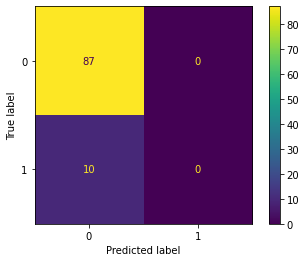

In [65]:
plot_confusion_matrix(rfModel, X_test, y_test)

In [64]:
dump(rfModel, 'rf.joblib')

['rf.joblib']

In [39]:
rfModel2 = load('rf.joblib')

In [40]:
rfModel2.score(X_test, y_test)

0.8969072164948454

In [50]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,354,355,356,357,358,359,360,361,362,363
P22V15,1.475643,1.475643,1.475643,1.475643,1.475643,1.475643,1.475643,1.475643,2.119688,1.475643,...,-0.456494,-1.100539,-1.100539,-1.100539,-0.456494,-0.456494,-0.456494,-0.456494,-0.456494,-0.456494
P22V14,0.456288,0.456288,0.456288,0.456288,-0.090057,-0.090057,0.456288,0.456288,0.456288,0.456288,...,-1.182747,-1.182747,-1.182747,-1.182747,-1.182747,-1.182747,-1.182747,-0.636402,-0.636402,-0.636402
P10V4,-1.319538,-2.090504,-2.090504,-2.090504,-2.090504,-2.090504,-2.090504,-2.090504,-1.319538,-1.319538,...,0.993360,0.993360,0.993360,1.764326,1.764326,1.764326,1.764326,1.764326,1.764326,0.993360
P5V14,1.265343,1.265343,1.265343,1.265343,1.265343,1.265343,1.265343,1.265343,0.253069,0.253069,...,1.265343,1.265343,1.265343,0.253069,1.265343,1.265343,1.265343,1.265343,1.265343,1.265343
P19V3,0.708775,0.708775,0.708775,0.708775,0.708775,0.708775,0.708775,0.708775,0.708775,0.708775,...,1.158242,1.158242,1.158242,1.158242,1.158242,1.158242,1.158242,0.708775,0.708775,0.708775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P11V15,-0.333881,-0.333881,-0.333881,-0.333881,0.158154,0.158154,0.158154,0.158154,0.158154,0.158154,...,0.650189,0.650189,0.650189,0.650189,0.650189,0.650189,0.650189,0.650189,0.650189,0.650189
P17V4,2.588523,2.588523,2.588523,2.588523,2.588523,2.588523,1.925453,1.925453,1.262383,1.262383,...,-0.063757,-0.063757,-0.063757,-0.063757,-0.063757,-0.063757,-0.063757,-0.063757,0.599313,0.599313
P3V15,0.196760,0.196760,0.196760,-0.322231,-0.322231,-0.322231,-0.322231,-0.322231,-0.322231,-0.322231,...,-0.841221,-0.322231,-0.322231,-0.322231,-0.322231,-0.322231,-0.322231,-0.322231,-0.322231,-0.322231
P13V15,-0.025603,-0.025603,-0.025603,-0.025603,-0.025603,-0.025603,-0.025603,-0.025603,-0.025603,-0.025603,...,0.595697,0.595697,1.216997,0.595697,0.595697,0.595697,0.595697,0.595697,0.595697,0.595697


# Code for Hannah

In [42]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load

In [59]:
inputArray = dataStretched['P1V1'].values #Assuming this array is a array of 364 values

#Normalize the values of input
# Numpy array is just regular array
normArr = np.zeros([364])
amin, amax = min(inputArray), max(inputArray)
for i in range(0,len(inputArray)):
    val = inputArray[i]
    normArr[i] = (val-amin) / (amax-amin)

#Load model weights in from joblib file
rfModel = load('rf.joblib')
# label of 1 is stress, 0 otherwise
pred = rfModel.predict(normArr.reshape(1,-1))